In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math

data_O3 = pd.read_csv('O3.csv', delimiter = ',')
O3_MAG = data_O3['Magadino-Cadenazzo'].tolist()
O3_CHA = data_O3['Chaumont'].tolist()

data_NO2 = pd.read_csv('NO2.csv', delimiter = ';')
NO2_MAG = data_NO2['Magadino-Cadenazzo'].tolist()
NO2_CHA = data_NO2['Chaumont'].tolist()

data_SO2 = pd.read_csv('SO2.csv', delimiter = ';')
SO2_MAG = data_SO2['Magadino-Cadenazzo'].tolist()
SO2_CHA = []

data_PM25 = pd.read_csv('PM2.5.csv', delimiter = ';')
PM25_MAG = data_PM25['Magadino-Cadenazzo'].tolist()
PM25_CHA = []

data_PM10 = pd.read_csv('PM10.csv', delimiter = ';')
PM10_MAG = data_PM10['Magadino-Cadenazzo'].tolist()
PM10_CHA = data_PM10['Chaumont'].tolist()



def replace_nans_with_mean_values(liste):
    return [np.nanmean(liste) if isinstance(x, float) and math.isnan(x) else x for x in liste]

def replace_nans_with_mean_values(liste):
    return [np.nanmean(liste) if isinstance(x, float) and math.isnan(x) else x for x in liste]

def list_to_4_matrix(list1, list2, list3, list4, list5, list6, list7, list8, list9, list10):
    all_results = {}  # Dictionnaire pour stocker les sous-listes avec des noms explicites

    list_names = ['O3_MAG', 'O3_CHA', 'NO2_MAG', 'NO2_CHA', 'SO2_MAG', 'SO2_CHA', 
                  'PM25_MAG', 'PM25_CHA', 'PM10_MAG', 'PM10_CHA']

    for lst, name in zip([list1, list2, list3, list4, list5, list6, list7, list8, list9, list10], list_names):
        semaine_ete = []
        weekend_ete = []
        semaine_hiver = []
        weekend_hiver = []

        debut_annee = datetime(2024, 1, 1)
        debut_ete = datetime(2024, 6, 21)
        fin_ete = datetime(2024, 9, 22, 23)
        debut_hiver1 = datetime(2024, 1, 1)
        fin_hiver1 = datetime(2024, 3, 20, 23)
        debut_hiver2 = datetime(2024, 12, 21)
        fin_hiver2 = datetime(2024, 12, 31, 23)

        # Trier les données selon les périodes et week-end/semaine
        for i, val in enumerate(lst):
            current_time = debut_annee + timedelta(hours=i)
            is_weekend = current_time.weekday() >= 5
            is_ete = debut_ete <= current_time <= fin_ete
            is_hiver = (debut_hiver1 <= current_time <= fin_hiver1) or (debut_hiver2 <= current_time <= fin_hiver2)

            if is_ete:
                if is_weekend:
                    weekend_ete.append(val)
                else:
                    semaine_ete.append(val)
            elif is_hiver:
                if is_weekend:
                    weekend_hiver.append(val)
                else:
                    semaine_hiver.append(val)

        # Remplacer les NaN par la moyenne des valeurs
        semaine_hiver_no_nans = replace_nans_with_mean_values(semaine_hiver)
        semaine_ete_no_nans = replace_nans_with_mean_values(semaine_ete)

        # Calcul des moyennes pour chaque période (semaine/hiver, weekend/ete)
        for horaire, period_name in zip([semaine_hiver, weekend_hiver, semaine_ete, weekend_ete], 
                                        ['semaine_hiver', 'weekend_hiver', 'semaine_ete', 'weekend_ete']):
            
            horaire = replace_nans_with_mean_values(horaire)
            nb_jours = len(horaire) // 24

            moyennes_00_03 = []
            moyennes_06_09 = []
            moyennes_12_15 = []
            moyennes_18_21 = []

            for i in range(nb_jours):
                jour = horaire[i * 24:(i + 1) * 24]
                try:
                    moyennes_00_03.append(sum(jour[0:3]) / 3)
                    moyennes_06_09.append(sum(jour[6:9]) / 3)
                    moyennes_12_15.append(sum(jour[12:15]) / 3)
                    moyennes_18_21.append(sum(jour[18:21]) / 3)
                except:
                    continue  # Ignore les jours incomplets

            def moyenne_or_zero(l):
                return round(sum(l) / len(l), 2) if l else 0.0

            # Ajout des résultats dans le dictionnaire avec des noms clairs
            all_results[f"{period_name}_{name}"] = [
                moyenne_or_zero(moyennes_00_03),
                moyenne_or_zero(moyennes_06_09),
                moyenne_or_zero(moyennes_12_15),
                moyenne_or_zero(moyennes_18_21)
            ]

    return all_results

list_to_4_matrix(O3_MAG, O3_CHA, NO2_MAG, NO2_CHA, SO2_MAG, SO2_CHA, PM25_MAG, PM25_CHA, PM10_MAG, PM10_CHA)



values_hiver_MAG = [
                    [17.14, 20.05, 57, 11.53, 14.37, #6h00-9h00 weekday
                    25.38, 15.43, 44, 8.72, 10.63], #6h00-9h00 weekend
                    [51.91, 15.01, 67, 8.27, 11.28, #12-15h weekday
                    57.53, 11.50, 84, 4.67, 6.54], #12h-15h weekend
                    [28.45, 29.78, 55, 14.27, 20.11, #18-21h weekday
                    32.62, 25.06, 57, 11.97, 15.88], #18h-21h weekend
                    [20.26, 20.62, 45, 16.52, 18.79, #00-03h weekday
                    29.01, 18.62, 44, 14.57, 16.8] #OO-03h weekend
                    ]

values_ete_MAG = [
                    [39.72, 10.23, 41, 8.78, 14.66, #6h00-9h00 weekday
                    46.69, 7.45, 28, 9.72, 13.18], #6h00-9h00 weekend
                    [97.67, 4.02, 18, 8.21, 12.82, #12-15h weekday
                    96.65, 3.11, 20, 9.56, 13.04], #12h-15h weekend
                    [81.49, 6.45, 11, 8.85, 13.96, #18-21h weekday
                    77.34, 5.63, 13, 10.01, 14.05], #18h-21h weekend
                    [36.71, 7.49, 10, 8.95, 13.24, #00-03h weekday
                    43.11, 8.40, 11, 10.74, 14.53] #OO-03h weekend
                   ]

values_hiver_CHA = [
                    [72.36, 2.40, 0, 0, 3.15, #6h00-9h00 weekday
                    74.65, 2.17, 0, 0, 3.36], #6h00-9h00 weekend
                    [72.73, 3.07, 0, 0, 4.09, #12-15h weekday
                    73.93, 2.91, 0, 0, 3.53], #12h-15h weekend
                    [71.75, 4.07, 0, 0, 4.05, #18-21h weekday
                    73.57, 2.98, 0, 0, 2.63], #18h-21h weekend
                    [72.44, 2.63, 0, 0, 3.95, #00-03h weekday
                    76.68, 2.21, 0, 0, 3.29] #OO-03h weekend
                   ]

values_ete_CHA = [
                    [79.82, 2.42, 0, 0, 6.95, #6h00-9h00 weekday
                    83.73, 2.1, 0, 0, 7.73], #6h00-9h00 weekend
                    [89.36, 2.74, 0, 0, 8.74, #12-15h weekday
                    88.13, 2.21, 0, 0, 8.08], #12h-15h weekend
                    [88.06, 2.53, 0, 0, 7.9, #18-21h weekday
                    85.37, 2.28, 0, 0, 8.30], #18h-21h weekend
                    [87.17, 2.09, 0, 0, 7.23, #00-03h weekday
                    91.28, 2.33, 0, 0, 7.73] #OO-03h weekend
                   ]


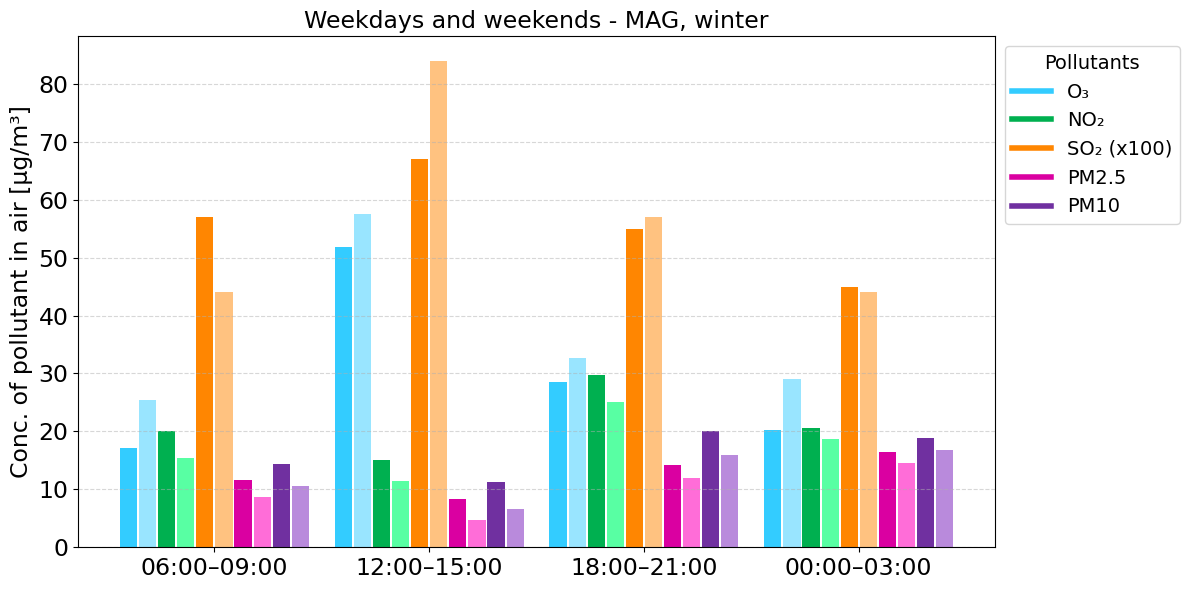

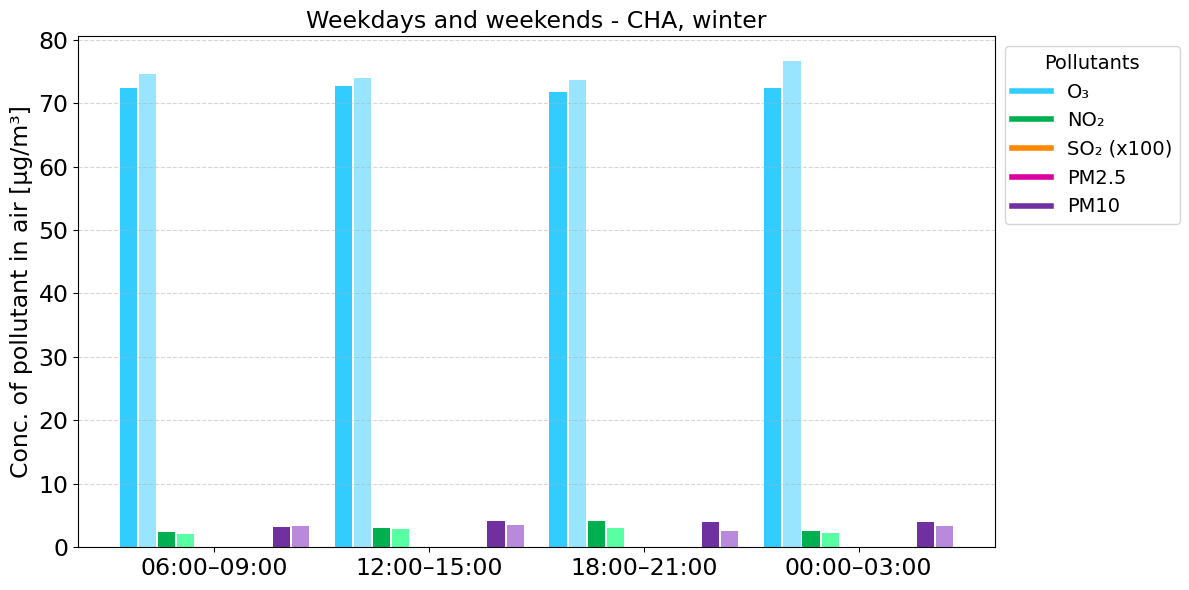

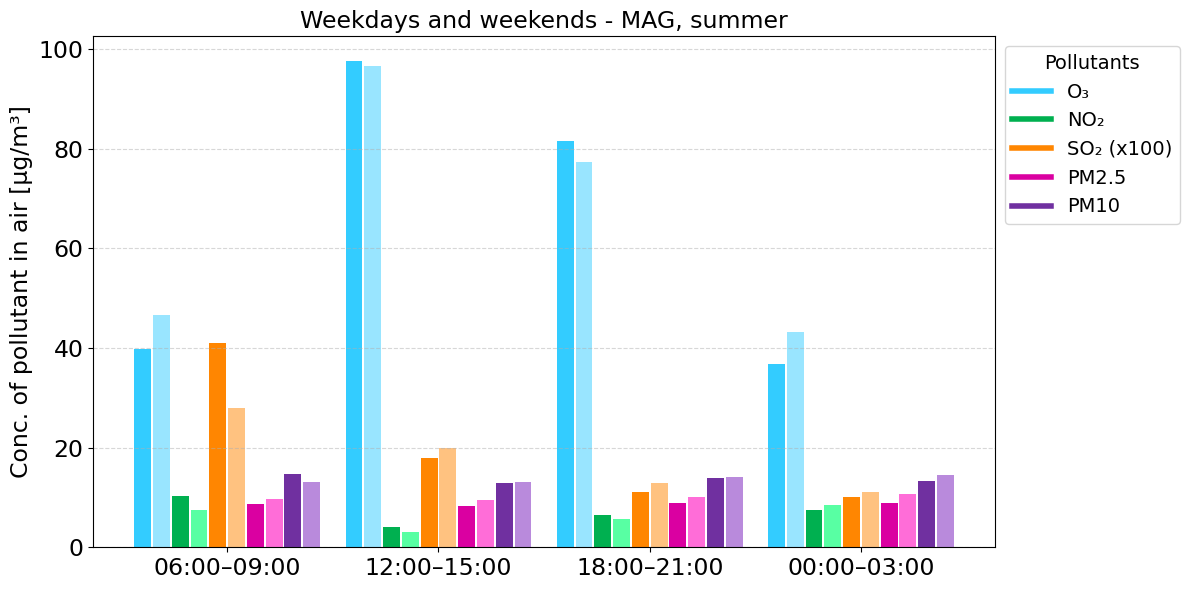

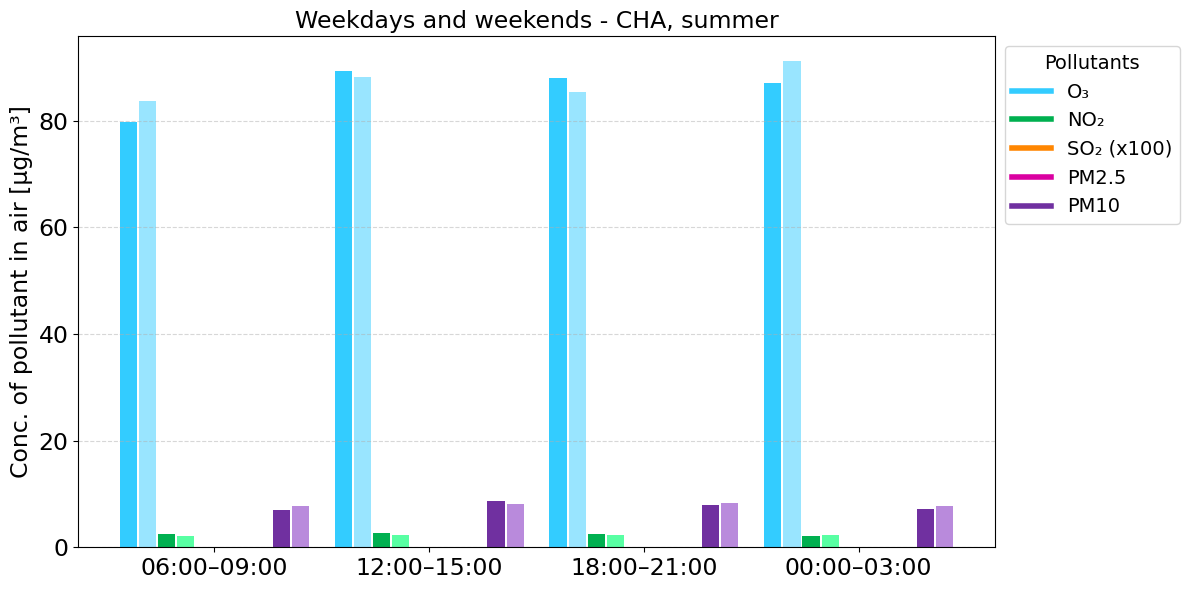

In [13]:
import matplotlib.colors as mcolors
import colorsys
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Pour la légende personnalisée

def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)
    hls = colorsys.rgb_to_hls(*rgb)
    lighter_rgb = colorsys.hls_to_rgb(hls[0], 1 - amount * (1 - hls[1]), hls[2])
    r, g, b = [int(c * 255) for c in lighter_rgb]
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

# Couleurs allégées pour le week-end
lighter_color_1 = lighten_color('#33CCFF', 0.5)
lighter_color_2 = lighten_color('#00B050', 0.5)
lighter_color_3 = lighten_color('#FF8601', 0.5)
lighter_color_4 = lighten_color('#DA00A1', 0.5)
lighter_color_5 = lighten_color('#7030A0', 0.5)

def plot_pollution_histogram(values, weekend_colors, title):
    if len(values) != 4 or len(values[0]) != 10:
        raise ValueError("La liste doit contenir 4 sous-listes, chacune avec 10 valeurs.")

    plages_horaires = ["06:00–09:00", "12:00–15:00", "18:00–21:00", "00:00–03:00"]
    polluants = ["O₃", "NO₂", "SO₂ (x100)", "PM2.5", "PM10"]

    if len(weekend_colors) != 5:
        raise ValueError("Tu dois fournir exactement 5 couleurs hex pour les polluants du week-end.")

    semaine_colors = ['#33CCFF', '#00B050', '#FF8601', '#DA00A1', '#7030A0']

    x = np.arange(len(plages_horaires))
    bar_width = 0.08
    offset = np.linspace(-0.4, 0.4, 10)

    fig, ax = plt.subplots(figsize=(12, 6))

    for plage_index in range(4):
        for i in range(10):
            if i % 2 == 0:
                polluant_index = i // 2
                valeur = values[plage_index][polluant_index]
                color = semaine_colors[polluant_index]
            else:
                polluant_index = (i - 1) // 2
                valeur = values[plage_index][polluant_index + 5]
                color = weekend_colors[polluant_index]

            xpos = x[plage_index] + offset[i]
            ax.bar(xpos, valeur, width=bar_width, color=color)

    # Taille des ticks
    ax.set_xticks(x)
    ax.set_xticklabels(plages_horaires, fontsize=17)
    ax.tick_params(axis='y', labelsize=17)

    # Titre et labels avec fontsize 14
    ax.set_ylabel("Conc. of pollutant in air [µg/m³]", fontsize=17)
    ax.set_title(title, fontsize=17)

    # Grille
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Légende personnalisée avec fontsize
    handles = [Line2D([0], [0], color=semaine_colors[i], lw=4, label=f"{polluants[i]}") for i in range(5)]
    ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=14, title='Pollutants', title_fontsize=14)

    plt.tight_layout()
    plt.show()


# Exemple d'utilisation avec la liste détaillée
values = [
    [21, 10, 10, 10, 25, 20, 30, 20, 17, 28],  # 06:00 à 09:00
    [18, 25, 14, 11, 30, 24, 35, 22, 19, 32],  # 12:00 à 15:00
    [16, 22, 13, 9, 27, 21, 28, 18, 16, 26],   # 18:00 à 21:00
    [14, 23, 11, 8, 24, 19, 27, 17, 15, 29]    # 00:00 à 03:00
]

weekend_colors = [lighter_color_1, lighter_color_2, lighter_color_3, lighter_color_4, lighter_color_5]  # couleurs personnalisées pour le week-end

plot_pollution_histogram(values_hiver_MAG, weekend_colors, "Weekdays and weekends - MAG, winter")
plot_pollution_histogram(values_hiver_CHA, weekend_colors, "Weekdays and weekends - CHA, winter")
plot_pollution_histogram(values_ete_MAG, weekend_colors, "Weekdays and weekends - MAG, summer")
plot_pollution_histogram(values_ete_CHA, weekend_colors, "Weekdays and weekends - CHA, summer" )

